In [41]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow.keras.utils as ku
import tensorflow as tf
import numpy as np
import re

In [42]:
tokenizer = Tokenizer()

data = open('fellowship2-small.txt').read()

data = data.replace(',', 'pausesentence')
data = data.replace('!', 'exclamationmark')
data = data.replace('?', '.')

corpus = data.lower().split(". ")

for i in range(len(corpus)):
    corpus [i] =  corpus [i] + 'endofthesentence'

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [63]:
total_words, max_sequence_len #tokenizer.word_counts

(2706, 342)

In [59]:
tokenizer.word_index['thatpausesentence']

1889

In [44]:
model = Sequential()

model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(40, activation='relu'))
model.add(Dense(total_words, activation='softmax'))
    
model.compile(loss='categorical_crossentropy', optimizer=tf.train.AdamOptimizer(), metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 341, 64)           173184    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 341, 40)           13600     
_________________________________________________________________
dropout_2 (Dropout)          (None, 341, 40)           0         
_________________________________________________________________
bidirectional_5 (Bidirection (None, 40)                9760      
_________________________________________________________________
dense_4 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_5 (Dense)              (None, 2706)              110946    
Total params: 309,130
Trainable params: 309,130
Non-trainable params: 0
_________________________________________________________________
None

In [46]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
11057/11057 [==============================] - 356s 32ms/step - loss: 6.8032 - acc: 0.0668
Epoch 2/100
11057/11057 [==============================] - 346s 31ms/step - loss: 6.3282 - acc: 0.0680
Epoch 3/100
11057/11057 [==============================] - 347s 31ms/step - loss: 6.1553 - acc: 0.0714
Epoch 4/100
11057/11057 [==============================] - 359s 32ms/step - loss: 6.0356 - acc: 0.0767
Epoch 5/100
11057/11057 [==============================] - 312s 28ms/step - loss: 5.9454 - acc: 0.0802
Epoch 6/100
11057/11057 [==============================] - 258s 23ms/step - loss: 5.8559 - acc: 0.0813
Epoch 7/100
11057/11057 [==============================] - 264s 24ms/step - loss: 5.7722 - acc: 0.0881
Epoch 8/100
11057/11057 [==============================] - 260s 23ms/step - loss: 5.6782 - acc: 0.0971
Epoch 9/100
11057/11057 [==============================] - 260s 23ms/step - loss: 5.5828 - acc: 0.1029
Epoch 10/100
11057/11057 [==============================] - 261s 24ms/ste

In [47]:
model.save_weights("model_dark.h5")

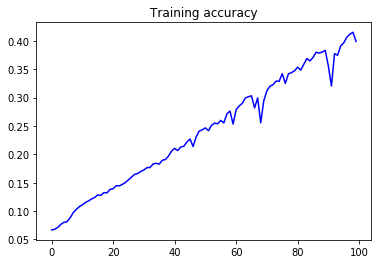

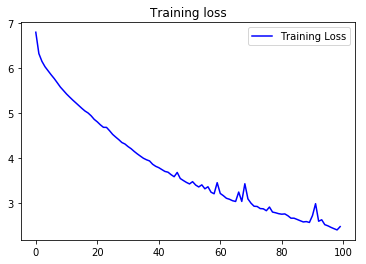

In [48]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [61]:
model.load_weights("model_dark.h5")

In [62]:
seed_text = "One ring to rule them all"
next_words = 500
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            if output_word == 'endofthesentence':
                output_word = '.'
            break
    seed_text += " " + output_word
    
seed_text = seed_text.replace('endofthesentence', '.')
seed_text = seed_text.replace('pausesentence', ',')
seed_text = seed_text.replace('exclamationmark', '!')

rtn = re.split('([.!?] *)', seed_text)
seed_text = ''.join([each.capitalize() for each in rtn])

count_sentences = 0
for i in range(len(seed_text)):
    if seed_text[i] == '.':
        count_sentences += 1
        if count_sentences%5 == 0:  
            seed_text = seed_text[:i] + '.\n\n' + seed_text[i+1:].strip()

print(seed_text)

One ring to rule them all the others were veiled in deepening dusk, and the wind was cold. Where the company hand music things were to be found, and they saw upon the walls and crawl up the road footstep that is a steady inflow of chill air out inside, into the water. Shaft they could not be disastrous. Spring over the mountains of the world! And thither we are not back up and gimli yes,' said gandalf. For us, that he said, on his staff aloft.

At tears, and gimli was silent. And paused. As its spirits are tried against a great pace, and the mountains bobbing and to drag your passing towards him about the western archway could not narrow, stood down in the forge's fire came in the shadow of the forge's western sky is ashen cold on the world in the world in the floor, dwells in fear, and were rotting in the world to the mountains tall, in rivendell. It, and i had no path were to plundered common ' said gandalf. Exactly there is a fall of moria.

Away! ' said gandalf, on either side, and